<img src="https://nyp-aicourse.s3.ap-southeast-1.amazonaws.com/agods/nyp_ago_logo.png" width='400'/>

Welcome to the lab! Before we get started here are a few pointers on using this notebooks.

1. The notebook is composed of cells; cells can contain code which you can run, or they can hold text and/or images which are there for you to read.

2. You can execute code cells by clicking the ```Run``` icon in the menu, or via the following keyboard shortcuts ```Shift-Enter``` (run and advance) or ```Ctrl-Enter``` (run and stay in the current cell).

3. To interrupt cell execution, click the ```Stop``` button on the toolbar or navigate to the ```Kernel``` menu, and select ```Interrupt ```.
    

# Layouts

There are multiple ways to define a visualization layout in Matplotlib. By layout, we mean the arrangement of multiple Axes within a Figure. We will start with *subplots* and how to use the tight layout to create visually appealing plots and then cover *GridSpec*, which offers a more flexible way to create multi-plots.

## Subplots

It is often useful to display several plots next to one another. Matplotlib offers the concept of *subplots*, which are multiple Axes within a Figure. These plots can be grids of plots, nested plots, and so on.

Explore the following options to create subplots:

- The `plt.subplots(, ncols)` function creates a Figure and a set of subplots. `nrows, ncols` define the number of rows and columns of the subplots, respectively.
- The `plt.subplot(nrows, ncols, index)` function or, equivalently, `plt.subplot(pos)` adds a subplot to the current Figure. The index starts at 1. The `plt.subplot(2, 2, 1)` function is equivalent to `plt.subplot(221)`.

Subplots are an easy way to create a Figure with multiple plots of the same size placed in a grid. They are not really suited for more sophisticated layouts.

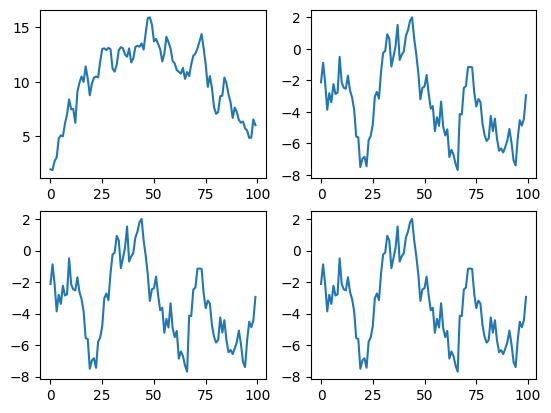

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

# create four different series
series = [np.cumsum(np.random.normal(0, 1, size=100)) for i in range(4)]
fig, axes = plt.subplots(2, 2)
axes[0][0].plot(series[0])  # row 0 column 0
axes[0][1].plot(series[1])  #  row 0 column 1
axes[1][0].plot(series[1])  #  row 1 column 0
axes[1][1].plot(series[1])  #  row 1 column 1


You may have noticed that x-axis labels and y-axis labels are repeated over the 4 different subplots. In the case where the scales for the different subplots are the same, it may be better to display the axis labels once. You can do this using `sharex` and `sharey` parameters. 

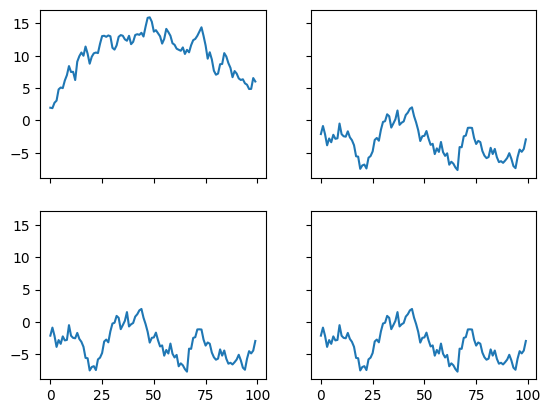

In [2]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
axes[0][0].plot(series[0])  # row 0 column 0
axes[0][1].plot(series[1])  #  row 0 column 1
axes[1][0].plot(series[1])  #  row 1 column 0
axes[1][1].plot(series[1])  #  row 1 column 1

## Tight Layout

The `plt.tight_layout()` adjusts subplot parameters (primarily padding between the Figure edge and the edges of subplots, and padding between the edges of adjacent subplots) so that the subplots fit well in the Figure.

In the code below, we are trying to draw 4 subplots with titles. You will see that that resultant plots are overlapping each other because of the extra space occupied by the title.

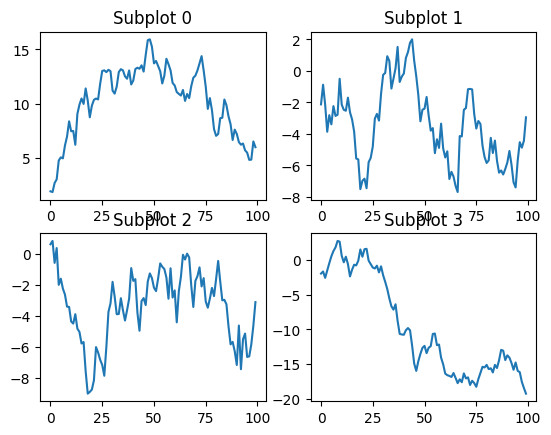

In [3]:
fig, axes = plt.subplots(2, 2)
axes = axes.ravel()
for i, ax in enumerate(axes):
    ax.plot(series[i])
    ax.set_title('Subplot ' + str(i))

Using `plt.tight_layout()` will automatically added extra padding required to avoid overlapping of the subplots:

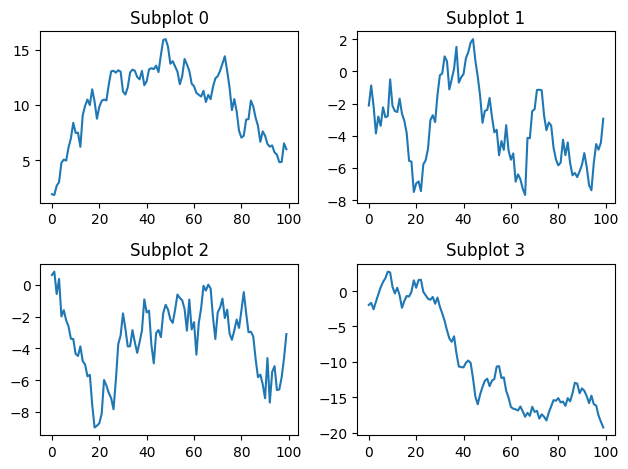

In [4]:
fig, axes = plt.subplots(2, 2)
axes = axes.ravel()
for i, ax in enumerate(axes):
    ax.plot(series[i])
    ax.set_title('Subplot ' + str(i))
plt.tight_layout()

## GridSpec

The `matplotlib.figure.Figure.add_gridspec(nrows, ncols)` function specifies the geometry of the grid in which a subplot will be placed. For example, you can specify a grid with three rows and three columns. As a next step, you have to define which elements of the gridspec are used by a subplot; elements of a gridspec are accessed in the same way as NumPy arrays. You could, for example, only use a single element of a gridspec for a subplot and therefore end up with 9 subplots in total. Another possibility, as shown in the following example, is to create a subplot that spans rows and columns.

C:\Users\markk\AppData\Local\Temp\ipykernel_3388\4198412108.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


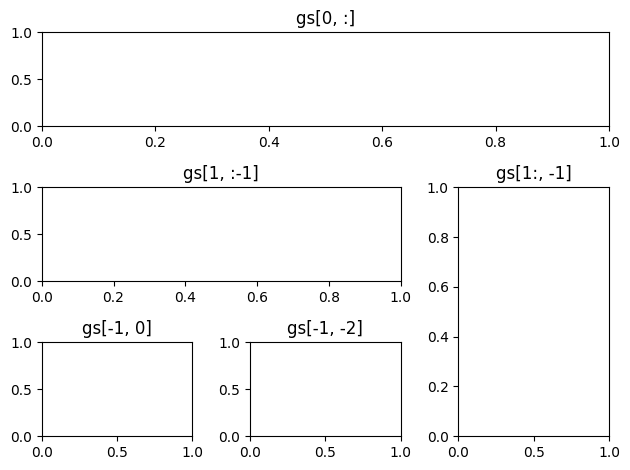

In [5]:
fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(3, 3)
ax1 = fig.add_subplot(gs[0, :])
ax1.set_title('gs[0, :]')
ax2 = fig.add_subplot(gs[1, :-1])
ax2.set_title('gs[1, :-1]')
ax3 = fig.add_subplot(gs[1:, -1])
ax3.set_title('gs[1:, -1]')
ax4 = fig.add_subplot(gs[-1, 0])
ax4.set_title('gs[-1, 0]')
ax5 = fig.add_subplot(gs[-1, -2])
ax5.set_title('gs[-1, -2]')
plt.tight_layout()

## Exercise 

In this exercise, we will make use of GridSpec to visualize a scatter plot with marginal histograms. This is similar to previous exercise where we use scatter plot to visualize the correlation between longetivy and body mass of various animal classes. However, in this exercise, we will only visualize the animal class 'Aves' with body mass < 20,000 gram. 

After executing the preceding steps, the expected output should be as follows:


<img src="images/gridspec_exercise.png" width="70%"/>

In [6]:
#TODO: Complete the code below

# Step 1: Import the necessary packages


# Step 2: Import dataset. Check for missing values, drop rows with missing values


# Step 3: Create a Figure with constrained layout. 


# Step 4a: Create a Gridspec of size 4x4. 



# Step 4b: Specify subplots for scatter, hist for x and hist for y



# Step 4c: Create the scatter plot, the marginal histograms using the respecitve subplots



# Step 4d: Add labels and title


<details>
    <summary>Click here for solution</summary>

```python

#TODO: Complete the code below

# Step 1: Import the necessary packages

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Step 2: Import dataset. create a subset that contains only Class, Longevity and Body Mass data from 'Aves' class. Drop any null values.

df = pd.read_csv('datasets/anage_data.csv')

BODY_MASS = 'Body mass (g)'
LONGEVITY = 'Maximum longevity (yrs)'

df_filtered = df[['Class', LONGEVITY,  BODY_MASS]]
df_aves = df_filtered[df_filtered['Class'] == 'Aves'].dropna()
df_aves = df_aves[df[BODY_MASS] < 20000]

# Step 3: Create a Figure with constrained layout. 

fig = plt.figure(figsize=(8, 8), dpi=150, constrained_layout=True)

# Step 4a: Create a Gridspec of size 4x4. 

gs = fig.add_gridspec(4, 4)


# Step 4b: Specify subplots for scatter, hist for x and hist for y

histx_ax = fig.add_subplot(gs[0, :-1])  # histogram for x
histy_ax = fig.add_subplot(gs[1:, -1]) # histogram for y
scatter_ax = fig.add_subplot(gs[1:, :-1])  # scatter plot 

# Step 4c: Create the scatter plot, the marginal histograms using the respecitve subplots

histx_ax.hist(df_aves[BODY_MASS], bins=20, density=True)
histy_ax.hist(df_aves[LONGEVITY], bins=20, density=True, orientation='horizontal')
scatter_ax.scatter(df_aves[BODY_MASS], df_aves[LONGEVITY])

# Step 4d: Add labels and title

plt.xlabel('Body mass in grams')
plt.ylabel('Maximum longevity in years')
fig.suptitle('Scatter plot with marginal histograms')


```
    
</details>    

C:\Users\markk\AppData\Local\Temp\ipykernel_3388\754956772.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_aves = df_aves[df[BODY_MASS] < 20000]


Text(0.5, 0.98, 'Scatter plot with marginal histograms')

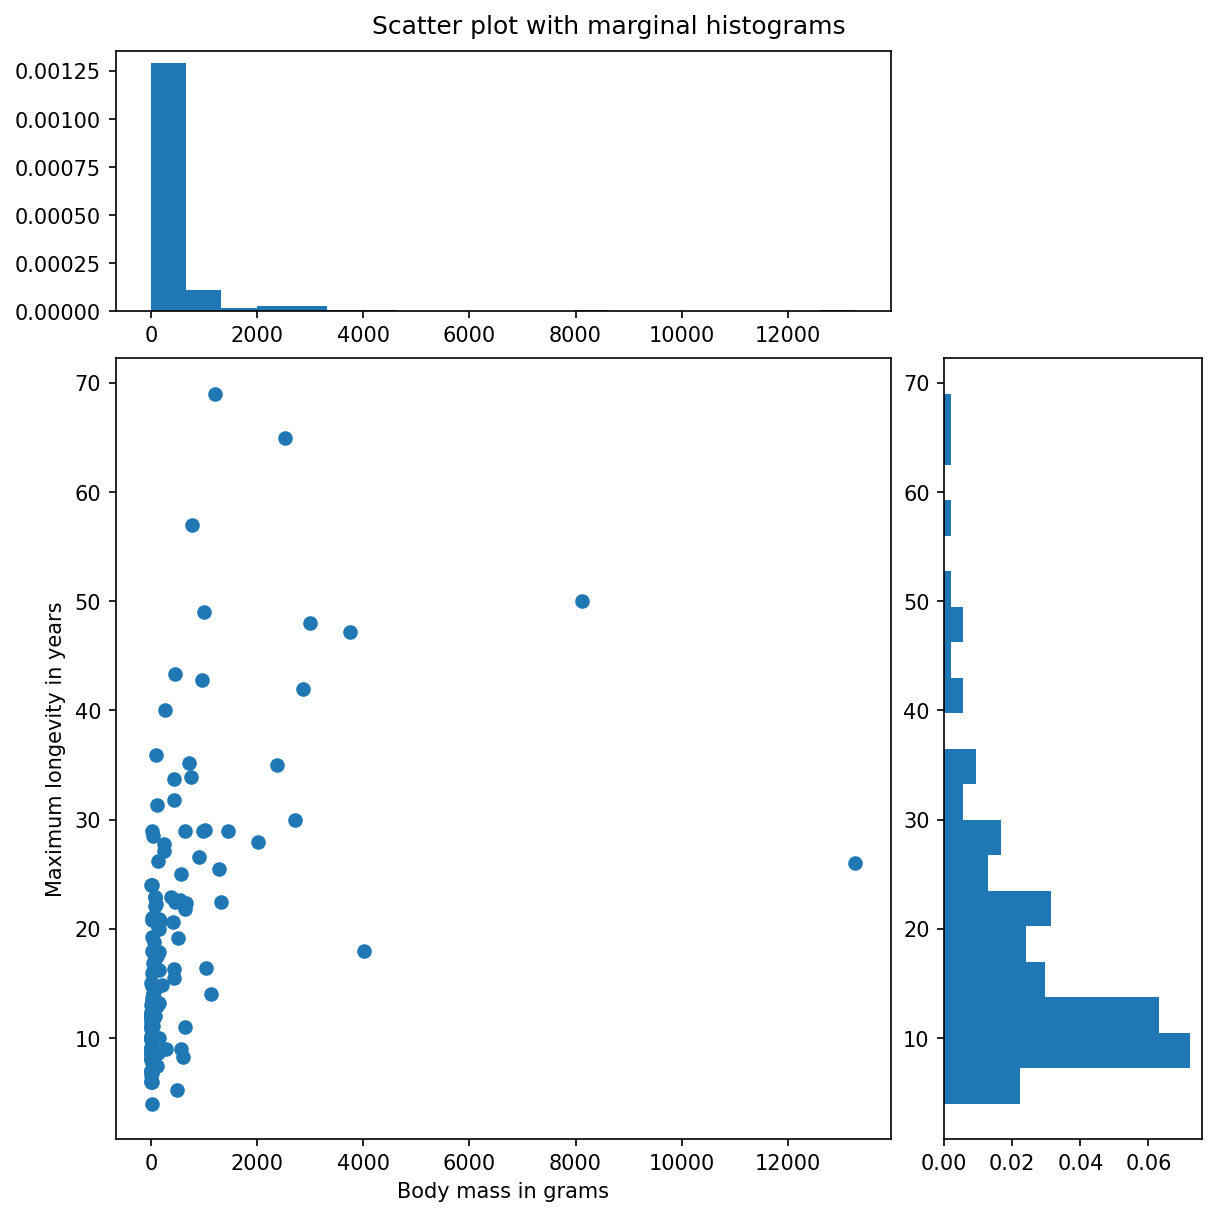

In [7]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Step 2: Import dataset. create a subset that contains only Class, Longevity and Body Mass data from 'Aves' class. Drop any null values.

df = pd.read_csv('datasets/anage_data.csv')

BODY_MASS = 'Body mass (g)'
LONGEVITY = 'Maximum longevity (yrs)'

df_filtered = df[['Class', LONGEVITY,  BODY_MASS]]
df_aves = df_filtered[df_filtered['Class'] == 'Aves'].dropna()
df_aves = df_aves[df[BODY_MASS] < 20000]

# Step 3: Create a Figure with constrained layout. 

fig = plt.figure(figsize=(8, 8), dpi=150, constrained_layout=True)

# Step 4a: Create a Gridspec of size 4x4. 

gs = fig.add_gridspec(4, 4)


# Step 4b: Specify subplots for scatter, hist for x and hist for y

histx_ax = fig.add_subplot(gs[0, :-1])  # histogram for x
histy_ax = fig.add_subplot(gs[1:, -1]) # histogram for y
scatter_ax = fig.add_subplot(gs[1:, :-1])  # scatter plot 

# Step 4c: Create the scatter plot, the marginal histograms using the respecitve subplots

histx_ax.hist(df_aves[BODY_MASS], bins=20, density=True)
histy_ax.hist(df_aves[LONGEVITY], bins=20, density=True, orientation='horizontal')
scatter_ax.scatter(df_aves[BODY_MASS], df_aves[LONGEVITY])

# Step 4d: Add labels and title

plt.xlabel('Body mass in grams')
plt.ylabel('Maximum longevity in years')
fig.suptitle('Scatter plot with marginal histograms')
